# THE BRIDGE (Data Science Bootcamp - Agosto 2020)
##  PROYECTO GRUPO D 
________________
### Análisis de datos asociados al COVID-19 del grupo de paises conformado por Portugal, Venezuela, Turquía, Reino Unido y España.

Fuente de datos (Data Set)  [https://covid.ourworldindata.org/data/owid-covid-data.csv]

Team members: 
- ** José Luis Manjon **     presimanjon@yahoo.es        git @JoseLuisManjon
- ** Filipa Teles      **    filipa.teles@icloud.com     git @Filipate
- ** Mónica Villasuso  **    villasuso.monica@gmail.com  git @MVillasuso
_________________

## 1. Librerías requeridas para el análisis (* Import *)
_________

In [1]:
import pandas as pd 
import json 
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px 
import plotly.io as pio
from datetime import datetime
import os

## 2. Carga de datos inicial, de la fuente, en el dataframe        
## *covid_general*
____________

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_general = pd.read_csv(url, sep=",")
covid_general.head(5)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0  ...          1.337        1803.987              NaN                597.029   
1  ...          1.337        1803.987              NaN                597.029   
2  ...          1.337        1803.987              NaN                597.029   
3  ...          1.337        1803.987              NaN                597.029   
4  ...          1.337        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  
0                         0.5            64.83  
1                         0.5            64.83  
2                         0.5            64.83  
3                         0.5            64.83  
4                         0.5            64.83  

[5 rows x 36 columns]

## 3. Preparación de los datos - Data wrangling and Data cleaning
________________
Exploración de los datos del dataframe

In [3]:
covid_general.shape

(36557, 36)

In [4]:
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36557 entries, 0 to 36556
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         36493 non-null  object 
 1   continent                        36266 non-null  object 
 2   location                         36557 non-null  object 
 3   date                             36557 non-null  object 
 4   total_cases                      36212 non-null  float64
 5   new_cases                        36212 non-null  float64
 6   total_deaths                     36212 non-null  float64
 7   new_deaths                       36212 non-null  float64
 8   total_cases_per_million          36148 non-null  float64
 9   new_cases_per_million            36148 non-null  float64
 10  total_deaths_per_million         36148 non-null  float64
 11  new_deaths_per_million           36148 non-null  float64
 12  new_tests         

In [5]:
covid_general.index

RangeIndex(start=0, stop=36557, step=1)

In [6]:
# Revisión de los datos globales para ver si hay información totalizada (continent or country tienen valor  Null) y eliminarla posteriormente para el análisis
covid_general[(covid_general.continent.isnull()) | (covid_general.iso_code.isnull())]

iso_code continent       location        date  total_cases  new_cases  \
36266  OWID_WRL       NaN          World  2019-12-31         27.0       27.0   
36267  OWID_WRL       NaN          World  2020-01-01         27.0        0.0   
36268  OWID_WRL       NaN          World  2020-01-02         27.0        0.0   
36269  OWID_WRL       NaN          World  2020-01-03         44.0       17.0   
36270  OWID_WRL       NaN          World  2020-01-04         44.0        0.0   
...         ...       ...            ...         ...          ...        ...   
36552       NaN       NaN  International  2020-02-28        705.0        0.0   
36553       NaN       NaN  International  2020-02-29        705.0        0.0   
36554       NaN       NaN  International  2020-03-01        705.0        0.0   
36555       NaN       NaN  International  2020-03-02        705.0        0.0   
36556       NaN       NaN  International  2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
36266           0.0         0.0                    0.003   
36267           0.0         0.0                    0.003   
36268           0.0         0.0                    0.003   
36269           0.0         0.0                    0.006   
36270           0.0         0.0                    0.006   
...             ...         ...                      ...   
36552           4.0         0.0                      NaN   
36553           6.0         2.0                      NaN   
36554           6.0         0.0                      NaN   
36555           6.0         0.0                      NaN   
36556           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
36266                  0.003  ...          5.355       15469.207   
36267                  0.000  ...          5.355       15469.207   
36268                  0.000  ...          5.355       15469.207   
36269                  0.002  ...          5.355       15469.207   
36270                  0.000  ...          5.355       15469.207   
...                      ...  ...            ...             ...   
36552                    NaN  ...            NaN             NaN   
36553                    NaN  ...            NaN             NaN   
36554                    NaN  ...            NaN             NaN   
36555                    NaN  ...            NaN             NaN   
36556                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
36266             10.0                 233.07                 8.51   
36267             10.0                 233.07                 8.51   
36268             10.0                 233.07                 8.51   
36269             10.0                 233.07                 8.51   
36270             10.0                 233.07                 8.51   
...                ...                    ...                  ...   
36552              NaN                    NaN                  NaN   
36553              NaN                    NaN                  NaN   
36554              NaN                    NaN                  NaN   
36555              NaN                    NaN                  NaN   
36556              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
36266           6.434        34.635                   60.13   
36267           6.434        34.635                   60.13   
36268           6.434        34.635                   60.13   
36269           6.434        34.635                   60.13   
36270           6.434        34.635                   60.13   
...               ...           ...                     ...   
36552             NaN           NaN                     NaN   
36553             NaN           NaN                     NaN   
36554             NaN           NaN                     NaN   
36555             NaN           NaN  

### Dataframe mundial sin los datos globales (continent) o de países con valor Nan  
### * world_df * 
____________

In [7]:

# DF Mundial sin los datos globales (continent is Nan) o de países Nan
world_df =  covid_general[~((covid_general.continent.isnull()) | (covid_general.iso_code.isnull()))]

In [8]:
world_df.shape          # Se eliminarán las 290 filas con valores Nan

(36266, 36)

In [9]:
world_df["date"]=pd.to_datetime(world_df["date"],format="%Y-%m-%d")


### Ranking con respecto al total de países
What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?
______________

In [10]:
#Ranking diario por países considerando el numero de casos totales (i.e. Total Infected)
world_df["rank_TC"] = world_df.groupby(["date"])["total_cases"].rank(method = "dense", ascending = False)

In [11]:
#Ranking diario por países considerando el numero de muertes (i.e. Total Deaths)
world_df["rank_TD"] = world_df.groupby(["date"])["total_deaths"].rank(method = "dense", ascending = False)

In [12]:
#Ranking diario por países considerando el numero de casos totales por millon de habitantes (i.e. total_cases_per_million)
world_df["rank_TCxM"] = world_df.groupby(["date"])["total_cases_per_million"].rank(method = "dense", ascending = False)

In [13]:
#Ranking diario por países considerando el numero de muertes totales por millon de habitantes (i.e. total_deaths_per_million)
world_df["rank_TDxM"] = world_df.groupby(["date"])["total_deaths_per_million"].rank(method = "dense", ascending = False)

In [14]:
# Lista de las columnas que almacenan la posición del ranking para cada país de acuerdo a cada  variable
cols_rank= ["rank_TC", "rank_TD", "rank_TCxM", "rank_TDxM" ]

### ANÁLISIS CONJUNTO PAISES DEL GRUPO D
### PORTUGAL, VENEZUELA, TURQUÍA, GRAN BRETAÑA y ESPAÑA
________________

### Dataframe de los datos correspondientes a los países del grupo D
### * covid_grupoD *

In [15]:
paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
covid_grupoD=world_df[world_df.iso_code.isin(paises_grupoD)]
covid_grupoD


iso_code      continent   location       date  total_cases  new_cases  \
26576      PRT         Europe   Portugal 2020-03-01          NaN        NaN   
26577      PRT         Europe   Portugal 2020-03-02          NaN        NaN   
26578      PRT         Europe   Portugal 2020-03-03          2.0        2.0   
26579      PRT         Europe   Portugal 2020-03-04          4.0        2.0   
26580      PRT         Europe   Portugal 2020-03-05          5.0        1.0   
...        ...            ...        ...        ...          ...        ...   
35504      VEN  South America  Venezuela 2020-08-09      24166.0        0.0   
35505      VEN  South America  Venezuela 2020-08-10      25805.0     1639.0   
35506      VEN  South America  Venezuela 2020-08-11      25805.0        0.0   
35507      VEN  South America  Venezuela 2020-08-12      27938.0     2133.0   
35508      VEN  South America  Venezuela 2020-08-13      29088.0     1150.0   

       total_deaths  new_deaths  total_cases_per_million  \
26576           NaN         NaN                      NaN   
26577           NaN         NaN                      NaN   
26578           0.0         0.0                    0.196   
26579           0.0         0.0                    0.392   
26580           0.0         0.0                    0.490   
...             ...         ...                      ...   
35504         208.0         0.0                  849.840   
35505         223.0        15.0                  907.478   
35506         223.0         0.0                  907.478   
35507         238.0        15.0                  982.489   
35508         247.0         9.0                 1022.931   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
26576                    NaN  ...                 9.85            16.3   
26577                    NaN  ...                 9.85            16.3   
26578                  0.196  ...                 9.85            16.3   
26579                  0.196  ...                 9.85            16.3   
26580                  0.098  ...                 9.85            16.3   
...                      ...  ...                  ...             ...   
35504                  0.000  ...                 6.47             NaN   
35505                 57.638  ...                 6.47             NaN   
35506                  0.000  ...                 6.47             NaN   
35507                 75.011  ...                 6.47             NaN   
35508                 40.442  ...                 6.47             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
26576          30.0                     NaN                        3.39   
26577          30.0                     NaN                        3.39   
26578          30.0                     NaN                        3.39   
26579          30.0                     NaN                        3.39   
26580          30.0                     NaN                        3.39   
...             ...                     ...                         ...   
35504           NaN                     NaN                        0.80   
35505           NaN                     NaN                        0.80   
35506           NaN                     NaN                        0.80   
35507           NaN                     NaN                        0.80   
35508           NaN                     NaN                        0.80   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
26576            82.05      NaN      NaN        NaN        NaN  
26577            82.05      NaN      NaN        NaN        NaN  
26578            82.05     28.0      8.0       33.0       10.0  
26579            82.05     31.0      9.0       35.0       11.0  
26580            82.05     31.0     10.0       37.0       13.0  
...                ...      ...      ...        ...        ...  
35504            72.06     64.0     81.0      117.0      138.0  
35505            72.06    

In [16]:
# Fecha mínima en la que aparecen valores reportados en el dataframe
covid_grupoD["date"].min()

Timestamp('2019-12-31 00:00:00')

In [17]:
#Selección de los registros a partir de la fecha en que comenzaron a reportar  datos de COVID
covid_grupoD[covid_grupoD["date"] == covid_grupoD["date"].min()]

iso_code continent        location       date  total_cases  new_cases  \
30664      ESP    Europe           Spain 2019-12-31          0.0        0.0   
34307      GBR    Europe  United Kingdom 2019-12-31          0.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
30664           0.0         0.0                      0.0   
34307           0.0         0.0                      0.0   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
30664                    0.0  ...                 7.17            27.4   
34307                    0.0  ...                 4.28            20.0   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
30664          31.4                     NaN                        2.97   
34307          24.7                     NaN                        2.54   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
30664            83.56      2.0      1.0        2.0        1.0  
34307            81.32      2.0      1.0        2.0        1.0  

[2 rows x 40 columns]

 *NOTA: A pesar de que tanto España como el Reino Unido tienen registros desde el 31/12/2019, estos No contienen información relacionada al Covid 19*

In [18]:
covid_grupoD.new_cases.value_counts(dropna = False).sum()

923

In [19]:
# Crear un DF con las filas de datos que No contienen informacion del COVID
nocovid_grupoD = covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)]
# Eliminar del DF las filas que NO contienen info del COVID
covid_grupoD=covid_grupoD.drop(covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)].index)

In [20]:
nocovid_grupoD.shape

(64, 40)

In [21]:
covid_grupoD.shape

(859, 40)

In [22]:
# Verificar si hay alguna columna donde TODOS sus datos sean nulos y por lo tanto no aporte información al análisis
covid_grupoD.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          2
new_cases                            2
total_deaths                         2
new_deaths                           2
total_cases_per_million              2
new_cases_per_million                2
total_deaths_per_million             2
new_deaths_per_million               2
new_tests                          442
total_tests                        412
total_tests_per_thousand           412
new_tests_per_thousand             442
new_tests_smoothed                 328
new_tests_smoothed_per_thousand    328
tests_per_case                     330
positive_rate                      330
tests_units                        300
stringency_index                    34
population                           0
population_density                   0
median_age                           0
aged_65_older            

In [23]:
# Eliminar la columna handwashing_facilities pues no contiend informacion
covid_grupoD.drop(columns=["handwashing_facilities"], axis = 1, inplace=True)

In [24]:
# Validación de la fecha mínima en que cada pais del grupo reporta información de Covid19
covid_grupoD.groupby("iso_code")["date"].min()

iso_code
ESP   2020-02-01
GBR   2020-02-01
PRT   2020-03-01
TUR   2020-03-12
VEN   2020-03-15
Name: date, dtype: datetime64[ns]

In [25]:
# Validación de la fecha máxima en que cada pais del grupo reporta información de Covid19
covid_grupoD.groupby("iso_code")["date"].max()

iso_code
ESP   2020-08-12
GBR   2020-08-13
PRT   2020-08-13
TUR   2020-08-13
VEN   2020-08-13
Name: date, dtype: datetime64[ns]

In [26]:
covid_grupoD.reset_index(inplace=True)

### Período de estado de alarma por país del grupo D y carga en un dataframe
(Fuentes:
- España, Gran Bretaña y Portugal
 https://www.cidob.org/biografias_lideres_politicos/organismos/union_europea/covid_19_la_respuesta_de_europa_contra_la_pandemia)

- Venezuela
 https://cronica.uno/publicado-en-gaceta-oficial-decreto-que-extiende-hasta-junio-estado-de-alarma-por-covid-19/
- Turquía
 https://elpais.com/sociedad/2020-04-10/el-aumento-de-casos-de-coronavirus-empuja-al-gobierno-turco-a-declarar-un-toque-de-queda-durante-el-fin-de-semana.html
 
*NOTA: En Turquía no se ha decretado oficialmente el estado de alarme, pero se han tomado medidas de contención con el objetivo de contener la propagación del virus* 

### * alarm_dates * 

In [27]:
alarm_dicc = {'iso_code': ["ESP", "PRT", "VEN", "GBR", "TUR"],
        'alarm_init': ['2020-03-14', '2020-03-13', '2020-03-13', '2020-03-23',np.NaN],
        'alarm_end': ['2020-06-21', '2020-06-01', '2020-07-11', '2020-07-04', np.NaN]
       }
alarm_dates = pd.DataFrame(alarm_dicc, columns = ['iso_code', 'alarm_init', 'alarm_end'])

alarm_dates

iso_code  alarm_init   alarm_end
0      ESP  2020-03-14  2020-06-21
1      PRT  2020-03-13  2020-06-01
2      VEN  2020-03-13  2020-07-11
3      GBR  2020-03-23  2020-07-04
4      TUR         NaN         NaN

## 4. Análisis de tendencias en los datos (EDA)
________________

In [28]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            859 non-null    int64         
 1   iso_code                         859 non-null    object        
 2   continent                        859 non-null    object        
 3   location                         859 non-null    object        
 4   date                             859 non-null    datetime64[ns]
 5   total_cases                      857 non-null    float64       
 6   new_cases                        857 non-null    float64       
 7   total_deaths                     857 non-null    float64       
 8   new_deaths                       857 non-null    float64       
 9   total_cases_per_million          857 non-null    float64       
 10  new_cases_per_million            857 non-null    float64      

In [29]:
#Lista de las columnas de datos para graficarlas y contrastar la tendencia entre los países del grupo D
cols = list(covid_grupoD.columns.values[[5,6,7,8,9,10,11,12,13,14,15,16,17,18,36,37,38,39]])
cols

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'rank_TC',
 'rank_TD',
 'rank_TCxM',
 'rank_TDxM']

### 4.1 ANÁLISIS GLOBAL GRUPO D : Visualización de los 5 países en una gráfica por cada columna de datos

In [30]:
# Guarda el resultado del gráfico dentro  del directorio indicado (creándolo si no existe)
def salvar_plot (dir_name, f_name):
    results_dir = os.path.join(dir_name) 
    if not os.path.isdir(results_dir): 
        os.makedirs(results_dir) 
    plt.savefig(results_dir + f_name,bbox_inches='tight') 

In [31]:
# Función para mostrar el valor de una columna de datos en un gráfico de líneas (1 por país)

def graf_grupo (x_val, y_val, hue_val, df, inv_y): 
    fig= plt.figure(figsize =(30,10))
    g = sns.relplot(x =x_val, y = y_val, hue = hue_val, kind = "line", data = df, palette = "Paired")
    g._legend.texts[0].set_text("")
    g._legend.set_title("Country")
    plt.xticks(rotation = "vertical")
    tit = y_val.upper() + " by Date and Country - Group D"
    plt.title(tit)

    file_name = y_val+ "_x_C_D" +  ".png"
    salvar_plot ( "../resources/plots/TOT_D/", file_name)

    if inv_y:
        plt.gca().invert_yaxis()
    plt.show()

<Figure size 2160x720 with 0 Axes>

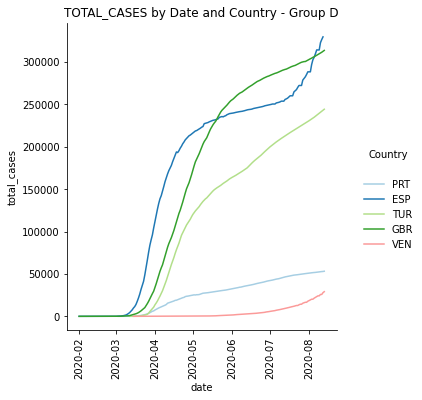

<Figure size 2160x720 with 0 Axes>

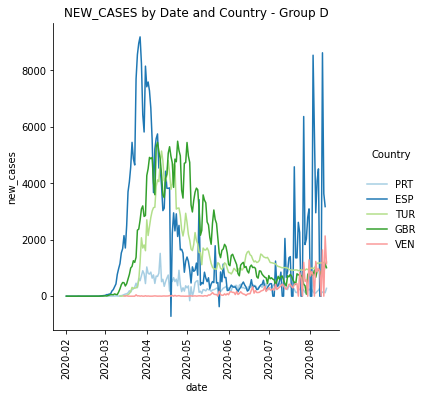

<Figure size 2160x720 with 0 Axes>

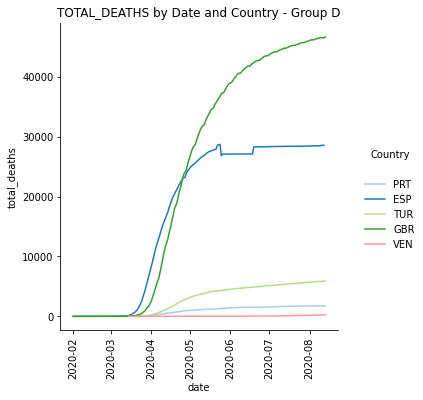

<Figure size 2160x720 with 0 Axes>

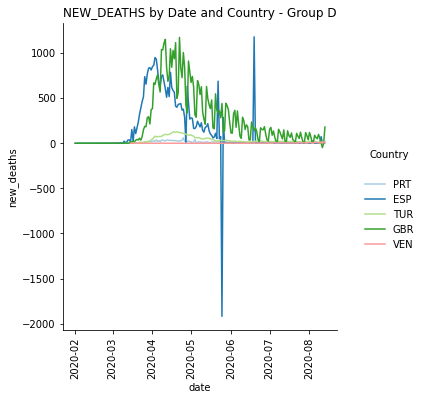

<Figure size 2160x720 with 0 Axes>

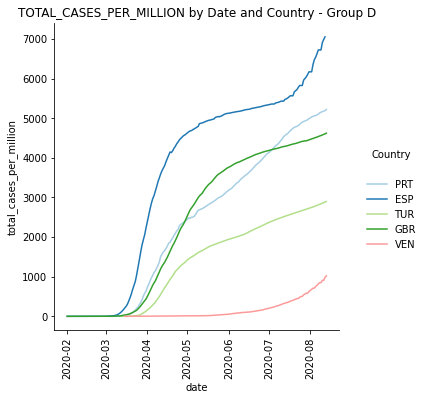

<Figure size 2160x720 with 0 Axes>

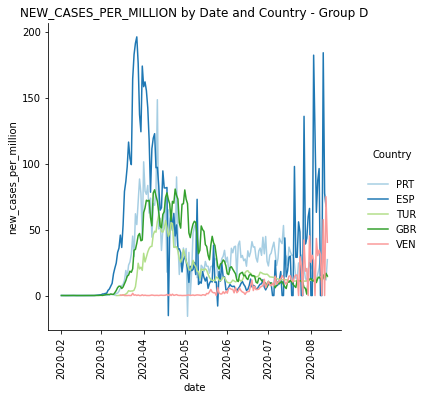

<Figure size 2160x720 with 0 Axes>

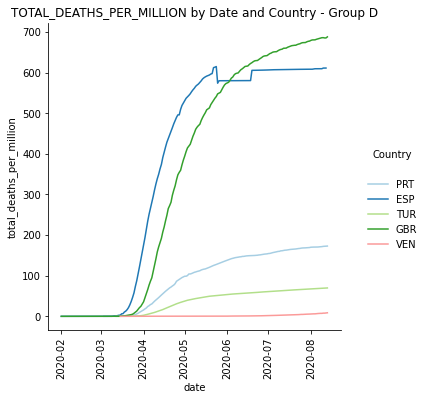

<Figure size 2160x720 with 0 Axes>

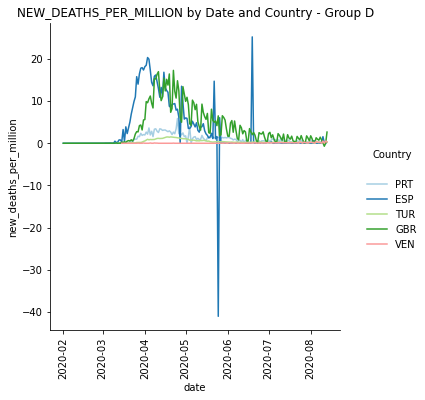

<Figure size 2160x720 with 0 Axes>

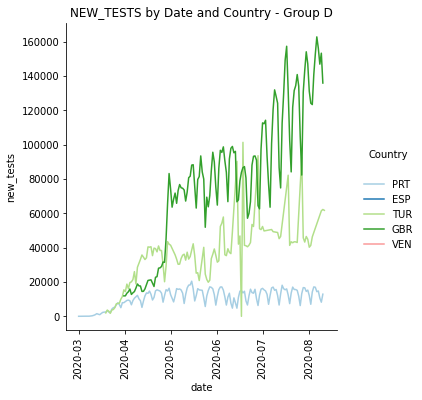

<Figure size 2160x720 with 0 Axes>

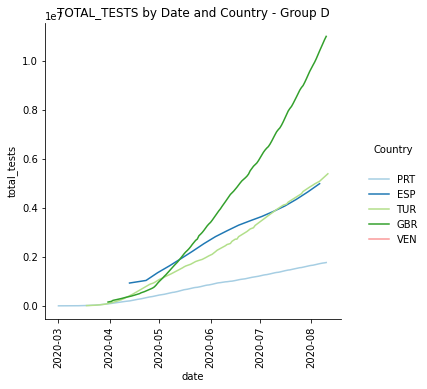

<Figure size 2160x720 with 0 Axes>

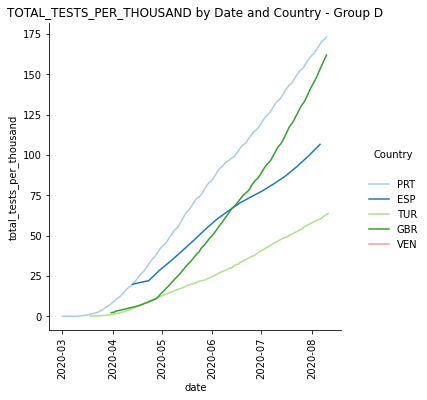

<Figure size 2160x720 with 0 Axes>

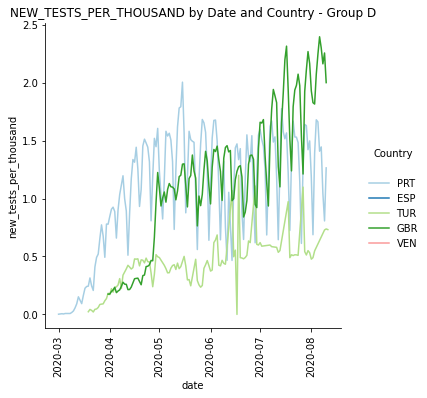

<Figure size 2160x720 with 0 Axes>

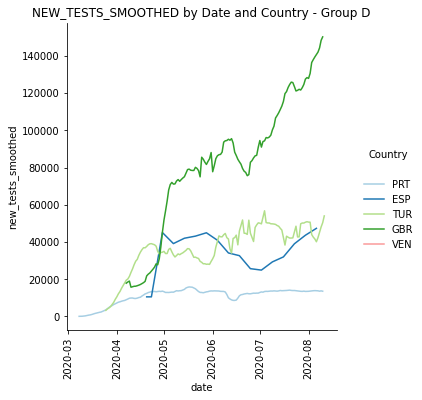

<Figure size 2160x720 with 0 Axes>

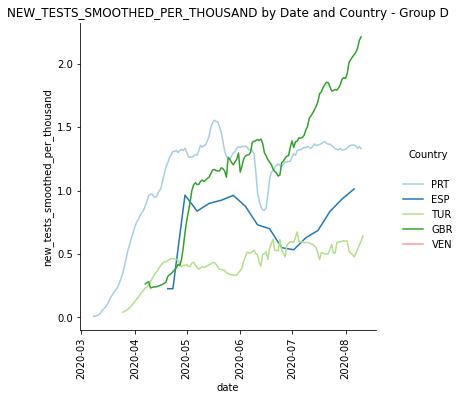

<Figure size 2160x720 with 0 Axes>

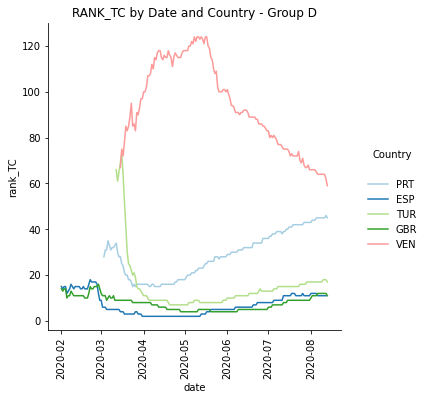

<Figure size 2160x720 with 0 Axes>

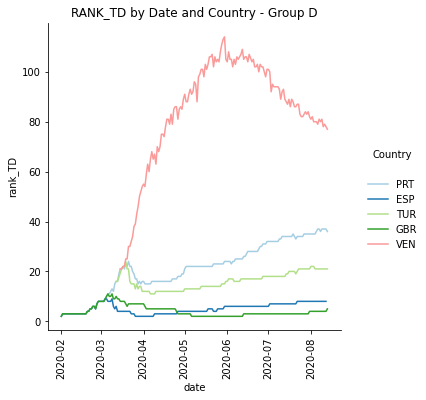

<Figure size 2160x720 with 0 Axes>

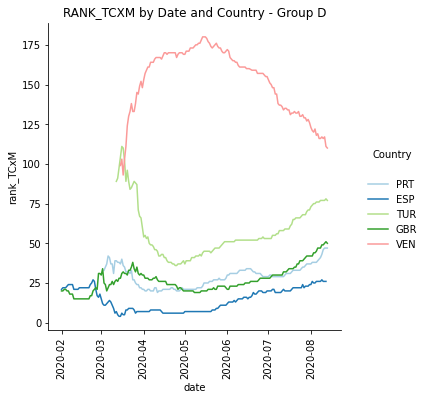

<Figure size 2160x720 with 0 Axes>

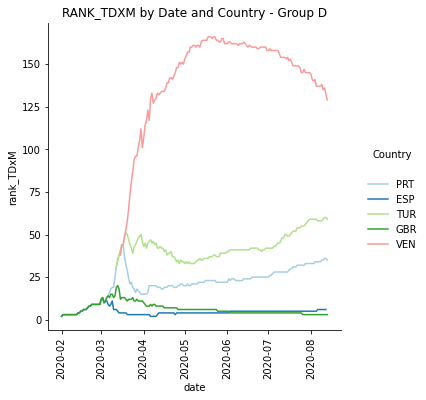

In [32]:
for elem in cols:
    graf_grupo("date" , elem , "iso_code", covid_grupoD, False )

______________
### 4.2 ANÁLISIS INDIVIDUAL POR PAÍS GRUPO D
Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot
______________

### GRÁFICOS POR PAÍS CON REFERENCIA A LAS FECHAS DE ESTADO DE ALARMA
- CASOS TOTALES y MUERTES TOTALES
- RANKING (EVOLUCIÓN DE LA POSICIÓN DESDE EL INICIO DE LA PANDEMIA)
- CASOS DIARIOS Y MUERTES DIARIAS
- MUERTES DIARIAS y MOMENTO EN QUE LA CURVA CRECE Y DECRECE

In [341]:
def graf_pais (ccode,col_dat, cname,cdf, y_maximo):
    if y_maximo:
        eje_y = cdf.total_cases.max()
        tit =  " Covid19  Totals - " + cname.title()
        filen= "Tot_"
    else:
        eje_y = cdf.rank_TCxM.max()
        tit =  " COVID19  Ranking - " + cname.title()
        filen= "Rank_"
    fg = cdf.plot(x="date", y= col_dat, kind="line", figsize=(12,8))
    fg.set_title(tit, fontsize=20)
    fg.legend(bbox_to_anchor=(1.3, 0.5))
    plt.vlines(alarm_dates.alarm_init[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.vlines(alarm_dates.alarm_end[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    filen=filen+ elem+".png"
    dirn = "../resources/plots/"+ elem+ "/"
    salvar_plot(dirn, filen)
    plt.show()

In [379]:
def graf_daily(n1,c1,n2,c2,ccode,df, cname):
    fig = go.Figure(data=[
        go.Bar(name= n1, x=df['date'], y=df[c1]),
        go.Bar(name= n2, x=df['date'], y=df[c2])])
    # Change the bar mode
    fig.update_layout(barmode='overlay', title={ "text":"Covid19  Daily Cases and Daily Deaths - " + cname.title(), "x":0.42, "xanchor": "center"} )
    fig.add_shape(
        dict(
        type= "line",
        x0 = alarm_dates.alarm_init[alarm_dates.iso_code==ccode].fillna("01-03-2020").values[0],
        y0 = 0,
        x1 = alarm_dates.alarm_init[alarm_dates.iso_code==ccode].fillna("01-03-2020").values[0],
        y1 = df[c1].max(),
        line  = dict (color = "Purple", width = 2, dash = "dot")
        ))
    fig.add_shape(
        dict(
        type= "line",
        x0 = alarm_dates.alarm_end[alarm_dates.iso_code==ccode].fillna("31-12-2020").values[0],
        y0 = 0,
        x1 = alarm_dates.alarm_end[alarm_dates.iso_code==ccode].fillna("31-12-2020").values[0],
        y1 = df[c1].max(),
        line  = dict (color = "Purple", width = 2, dash = "dot")
        ))
    fig.show()

In [388]:
def graf_dailyd(n2,c2,ccode,df, cname):
    fig = go.Figure(data=[
        go.Bar(name= n2, x=df['date'], y=df[c2])])
    # Change the bar mode
    fig.update_layout(barmode='overlay', title={ "text":"Covid19  Daily Deaths - " + cname.title(), "x":0.42, "xanchor": "center"} )
    fig.add_shape(
        dict(
        type= "line",
        x0 = df["date"][(df[c2] == df[c2].min())].max(),
        y0 = 0,
        x1 = df["date"][(df[c2] == df[c2].min())].max(),
        y1 = df[c2].max(),
        line  = dict (color = "Red", width = 1, dash = "dashdot")
    ))
    fig.add_shape(
        dict(
        type= "line",
        x0 = df["date"][(df[c2] == df[c2].max())].min(),
        y0 = 0,
        x1 = df["date"][(df[c2] == df[c2].max())].min(),
        y1 = df[c2].max(),
        line  = dict (color = "Green", width = 1, dash = "dashdot")
    ))
    fig.show()

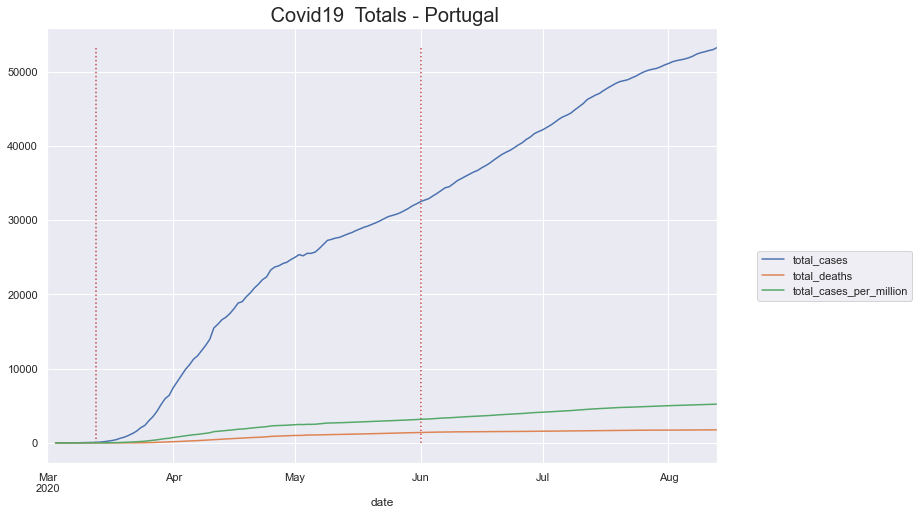

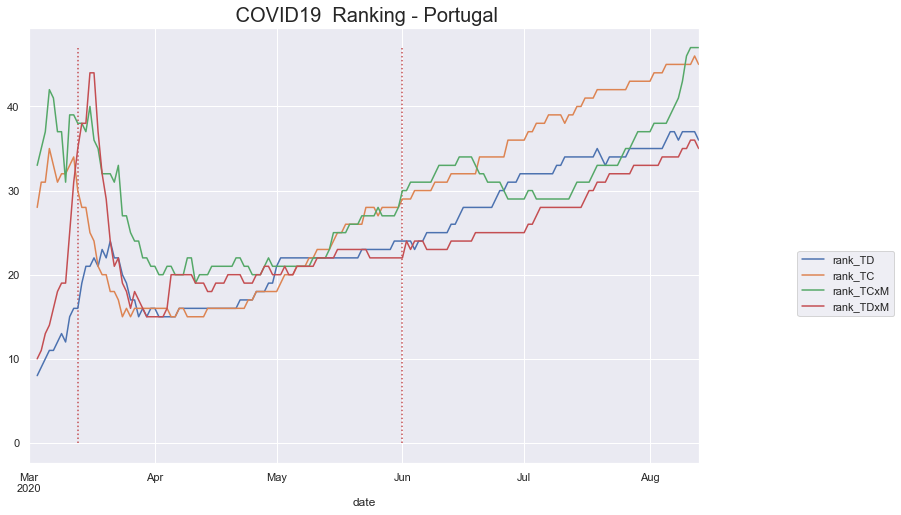

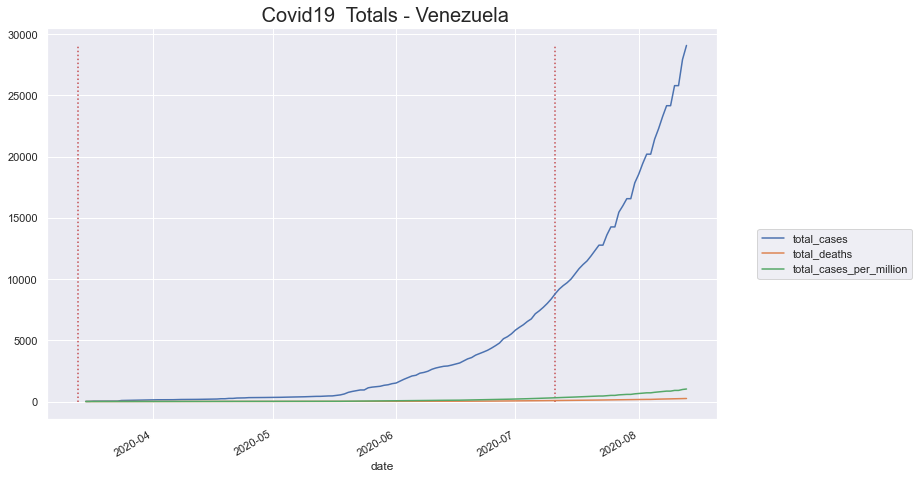

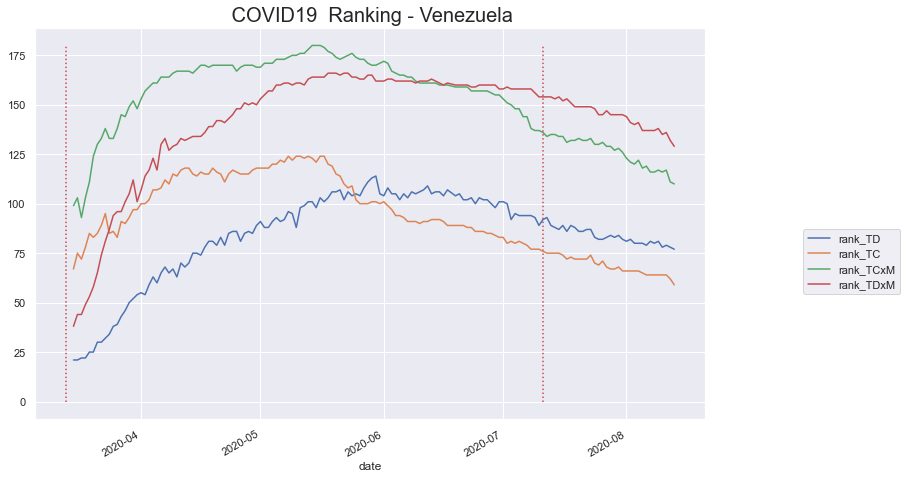

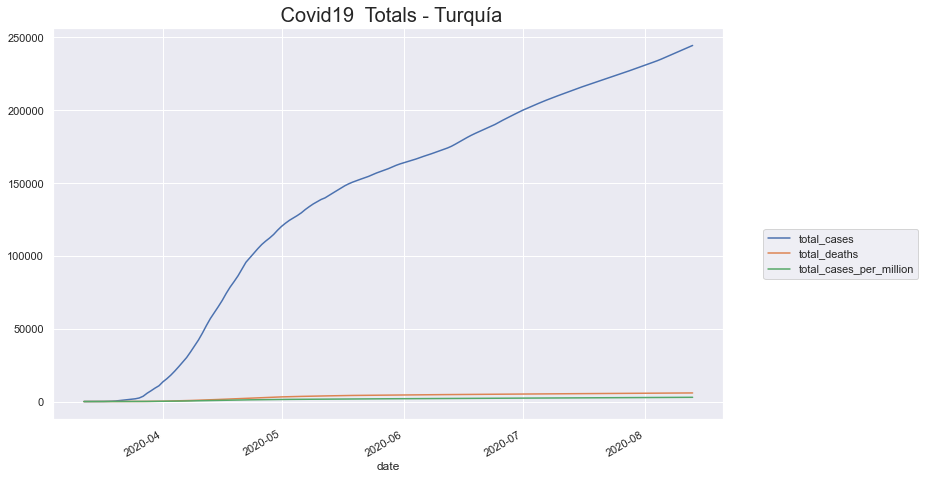

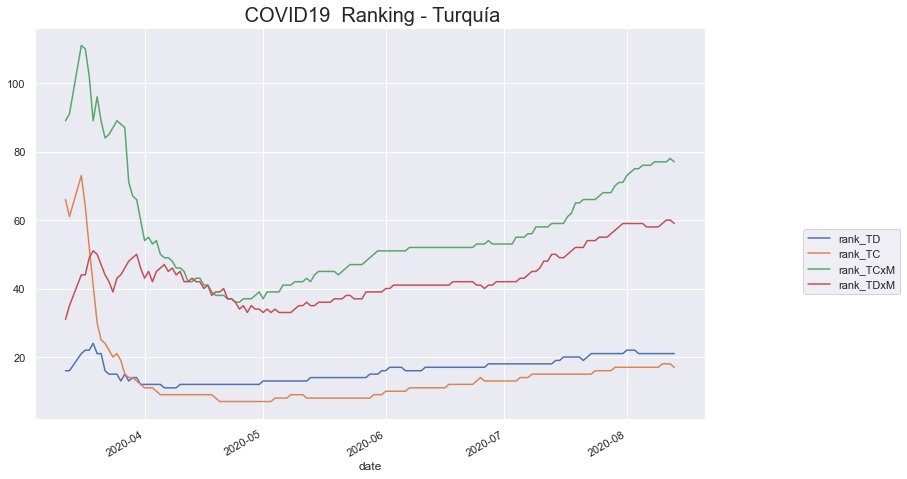

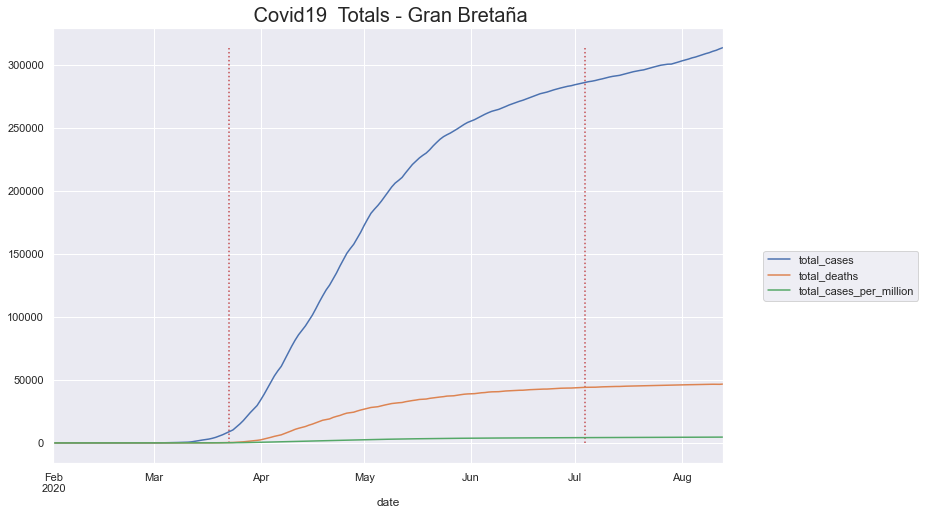

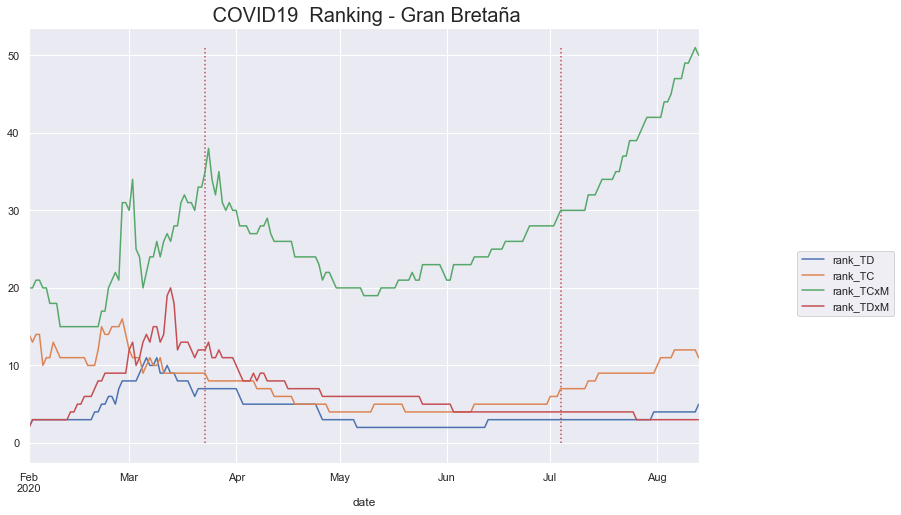

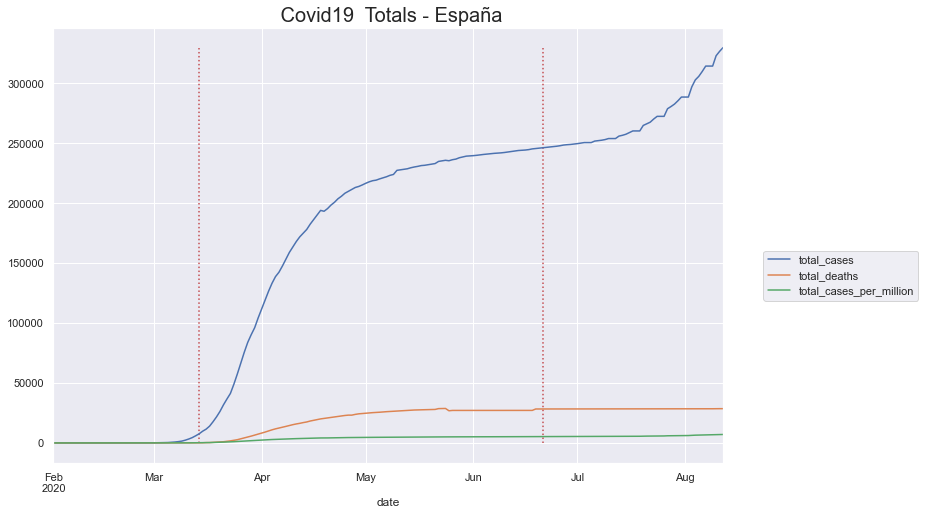

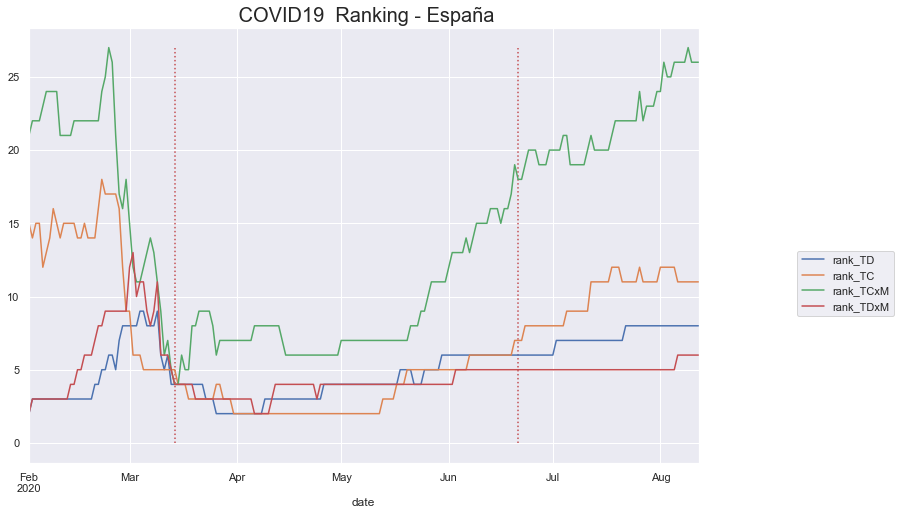

In [380]:
sns.set()
sns.set_style("darkgrid")
col_dat1 = ["total_cases", "total_deaths", "total_cases_per_million"]
col_dat2 = [ "rank_TD", "rank_TC", "rank_TCxM", "rank_TDxM"]
for elem in paises_grupoD:
    df = covid_grupoD[covid_grupoD.iso_code==elem]
    graf_pais(elem, col_dat1, paises_nombres[elem], df, True)
    graf_pais(elem, col_dat2, paises_nombres[elem], df, False) 
    graf_daily ('New daily cases',"new_cases", 'Daily deaths', "new_deaths", elem ,df, paises_nombres[elem] )
    graf_dailyd ('Daily deaths', "new_deaths", elem ,df, paises_nombres[elem] )



In [35]:
#Dataframe con información resumida de datos referenciales por país
datos_paises = covid_grupoD.iloc[:,[1,23,24,29,30,32,33]].drop_duplicates()

In [36]:
datos_paises.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 708
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   iso_code               5 non-null      object 
 1   population             5 non-null      float64
 2   population_density     5 non-null      float64
 3   extreme_poverty        4 non-null      float64
 4   cardiovasc_death_rate  5 non-null      float64
 5   female_smokers         4 non-null      float64
 6   male_smokers           4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 320.0+ bytes


In [37]:
datos_paises

iso_code  population  population_density  extreme_poverty  \
0        PRT  10196707.0             112.371              0.5   
166      ESP  46754783.0              93.105              1.0   
360      TUR  84339067.0             104.914              0.2   
513      GBR  67886004.0             272.898              0.2   
708      VEN  28435943.0              36.253              NaN   

     cardiovasc_death_rate  female_smokers  male_smokers  
0                  127.842            16.3          30.0  
166                 99.403            27.4          31.4  
360                171.285            14.1          41.1  
513                122.137            20.0          24.7  
708                204.850             NaN           NaN

### VARIACIÓN DEL STRINGENCY INDEX POR PAÍS
*Stringency Index: The Government Response Stringency Index is a composite measure based on nine response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).*

In [143]:
StrIdx_country = covid_grupoD.loc[:,["date","iso_code",  "stringency_index"]]

In [144]:
StrIdx_country.shape

(859, 3)

In [146]:
StrIdx_country = StrIdx_country[(StrIdx_country.stringency_index>0)]

In [148]:
StrIdx_country.set_index("date", inplace = True)
StrIdx_country.sort_index(inplace=True)

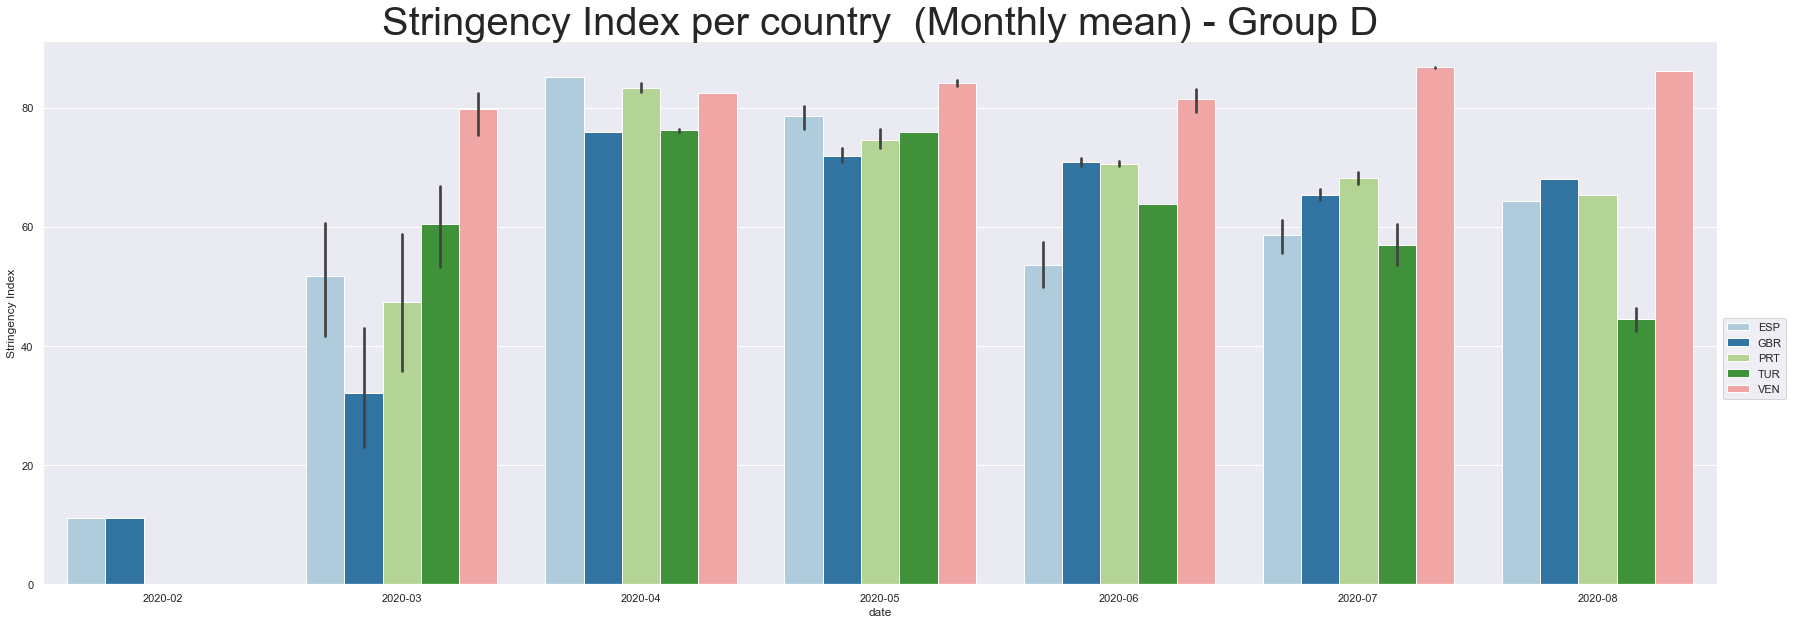

In [157]:

g= plt.figure(figsize =(30,10))
g = sns.barplot(x = StrIdx_country.index.to_period("M") ,y = "stringency_index", hue = "iso_code",  data = StrIdx_country, palette = "Paired")
g.set_title('Stringency Index per country  (Monthly mean) - Group D', fontsize=40)
g.set_ylabel('Stringency Index')
g.legend(bbox_to_anchor=(1, 0.5))
plt.show()

###   MUERTES TOTALES POR CONTINENTE

In [171]:
world_df.continent.value_counts()

Europe           9884
Asia             8948
Africa           8304
North America    5587
South America    2170
Oceania          1373
Name: continent, dtype: int64

<Figure size 3600x1080 with 0 Axes>

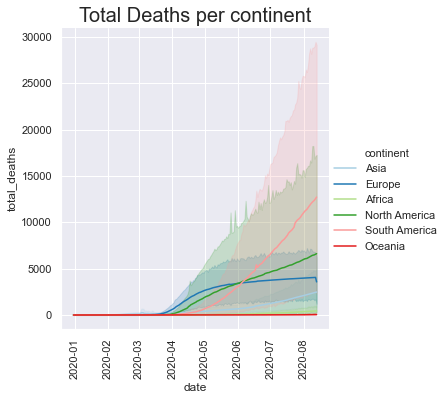

In [182]:
#Otra forma de graficar las total deaths de todos los paises.
g= plt.figure(figsize =(50,15))
g = sns.relplot(x ="date", y = "total_deaths", hue = "continent", kind = "line", data = world_df, palette = "Paired")
plt.title ('Total Deaths per continent', fontsize=20)
plt.xticks(rotation = "vertical")
plt.show()

In [210]:
fig = px.area(world_df, x="date", y="total_deaths", color="continent",
	      line_group="iso_code")
fig.update_layout(
    title = {"text" :"Total Deaths per continent - Area Graph", "x":0.4, "xanchor": "center"},
    xaxis_title="Date",
    yaxis_title="Total Deaths",
    legend_title="Continent",
    font=dict(
        size=12
    )
)

fig.show()

### CASOS TOTALES POR CONTINENTE

<Figure size 3600x1080 with 0 Axes>

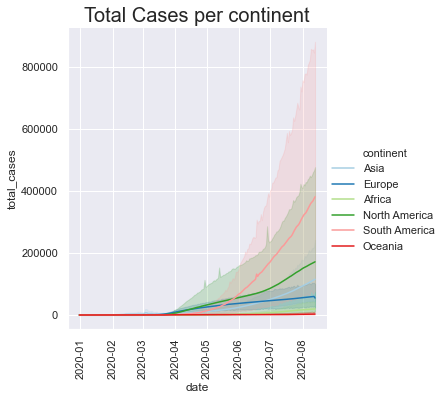

In [198]:
g= plt.figure(figsize =(50,15))
g = sns.relplot(x ="date", y = "total_cases", hue = "continent", kind = "line", data = world_df, palette = "Paired")
plt.title ('Total Cases per continent', fontsize=20)
plt.xticks(rotation = "vertical")
plt.show()

In [209]:
fig = px.area(world_df, x="date", y="total_cases", color="continent",
	      line_group="iso_code")
fig.update_layout(
    title = {"text" :"Total Cases per continent - Area Graph", "x":0.4, "xanchor": "center"},
    xaxis_title="Date",
    yaxis_title="Total Cases",
    legend_title="Continent",
    font=dict(
        size=12
    )
)

fig.show()

### ÍNDICE DE MORTALIDAD POR PAÍS - GRUPO D
*Según la tasa de mortalidad  calculada como expresión porcentual de total de muertes / total de casos*

In [200]:

covid_grupoD['mortality_rate'] = round((covid_grupoD['total_deaths']/covid_grupoD['total_cases'])*100, 2)

In [208]:
fig = px.line(covid_grupoD, x="date", y="mortality_rate", color="location", line_group="location", hover_name="location",
        line_shape="spline", render_mode="svg")

fig.update_layout(
    title = {"text" :"Mortality Rate per country - Group D", "x":0.4, "xanchor": "center"},
    xaxis_title="Date",
    yaxis_title="Mortality rate (%)",
    legend_title="Country",
    font=dict(
        size=12
    )
)
fig.show()

### MUERTES TOTALES EN EL MUNDO (MAPA)

In [211]:
world_df_map = (world_df.groupby('location')['total_cases'].max()).to_frame()
world_df_map['index'] = world_df_map.index
world_df_map.rename(columns={'index': 'country'}, inplace=True)
world_df_map

total_cases         country
location                                   
Afghanistan         37345.0     Afghanistan
Albania              6817.0         Albania
Algeria             36699.0         Algeria
Andorra               977.0         Andorra
Angola               1735.0          Angola
...                     ...             ...
Vietnam               883.0         Vietnam
Western Sahara        766.0  Western Sahara
Yemen                1841.0           Yemen
Zambia               8501.0          Zambia
Zimbabwe             4893.0        Zimbabwe

[210 rows x 2 columns]

In [370]:
fig = px.choropleth(world_df_map, locations=world_df_map['country'],
                    color=world_df_map['total_cases'],locationmode='country names', 
                    hover_name=world_df_map['country'], 
                    color_continuous_scale=px.colors.sequential.Darkmint,template='plotly_white')

fig.update_layout(
    title = {"text" :"Total Cases per Country - World Map", "x":0.5, "xanchor": "center"},
    font=dict(
        size=12
    )
)
fig.show()

In [237]:
world_df_map_td = (world_df.groupby('location')['total_deaths'].max()).to_frame()
world_df_map_td['index'] = world_df_map_td.index
world_df_map_td.rename(columns={'index': 'country'}, inplace=True)

In [369]:
fig = px.choropleth(world_df_map_td, locations=world_df_map['country'],
                    color=world_df_map_td['total_deaths'],locationmode='country names', 
                    hover_name=world_df_map_td['country'], 
                    color_continuous_scale=px.colors.sequential.Peach,template='plotly_white')

fig.update_layout(
    title = {"text" :"Total Deaths per Country - World Map", "x":0.5, "xanchor": "center"},
    font=dict(
        size=12
    )
)
fig.show()

_________
### 4.4 ANÁLISIS DE CORRELACIÓN
______________

In [91]:
#Matriz de correlación entre variables
grupoD_corr = covid_grupoD.iloc[:,np.r_[1,5,7,9,11,22:36]]     #Un subconjunto de las variables a contrastar

In [92]:
grupoD_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    839 non-null    object 
 1   total_cases                 837 non-null    float64
 2   total_deaths                837 non-null    float64
 3   total_cases_per_million     837 non-null    float64
 4   total_deaths_per_million    837 non-null    float64
 5   stringency_index            798 non-null    float64
 6   population                  839 non-null    float64
 7   population_density          839 non-null    float64
 8   median_age                  839 non-null    float64
 9   aged_65_older               839 non-null    float64
 10  aged_70_older               839 non-null    float64
 11  gdp_per_capita              839 non-null    float64
 12  extreme_poverty             692 non-null    float64
 13  cardiovasc_death_rate       839 non

In [93]:
grupoD_corr.shape

(839, 19)

### Correlación Países del Grupo D

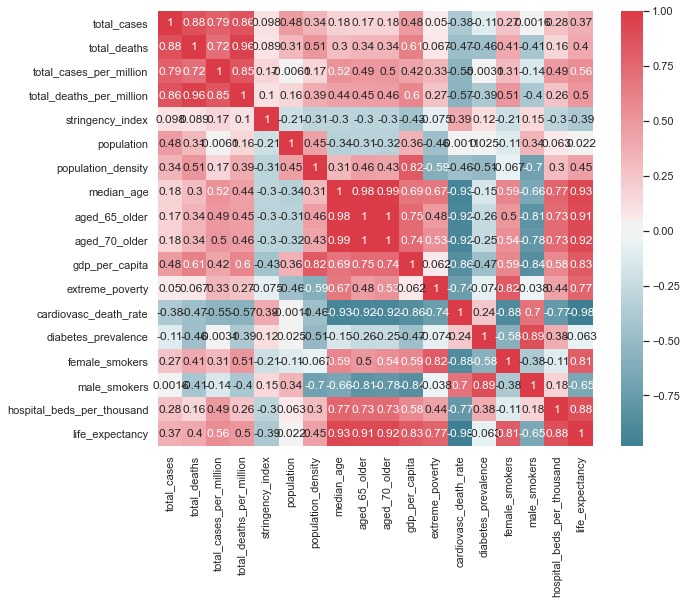

In [94]:
# Mapa de calor
f, ax = plt.subplots(figsize=(10, 8)) 
corr = grupoD_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

### Correlación - Todos los países


In [95]:
#Seleccion del DF mundial del subconjunto de las variables a correlacionar
world_df_corr = world_df.iloc[:,np.r_[0,4,6,8,10,21:33,34:36]]    

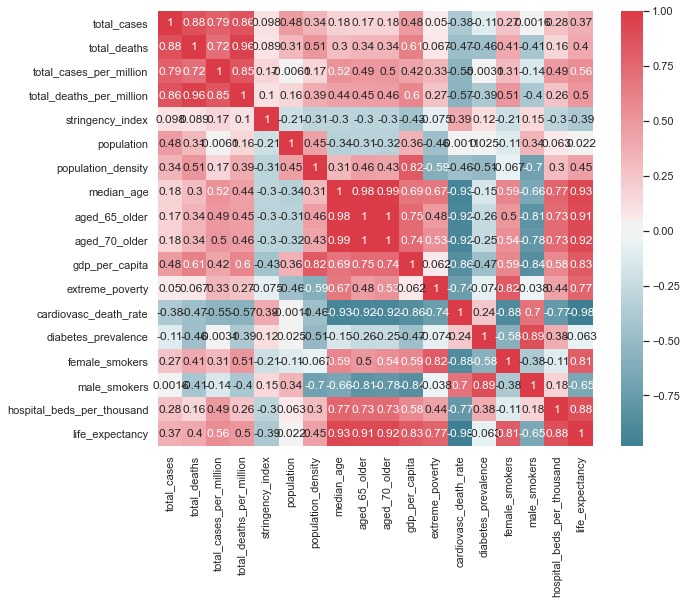

In [96]:
#Mapa de calor de la matriz de correlación 
f, ax = plt.subplots(figsize=(10, 8)) 
corr2 = world_df_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

### FALTA
- AGREGAR PIE CHARTS
- PONER DINAMICOS LOS GRFICOS INICIALES DE PAISES
- VER QUE TODOS LOS GRAFICOS SE GUARDEN EN EL DIRECTORIO
= CORREGIR MINIMOS Y MAXIMOS DE MUERTES
- BOX PLOT PARA OUTLIERS
